# Business Objectives







Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. 

 - Borrowers can easily access lower interest rate loans through a fast online interface.
 - Identify the risky loan applicants.
 - The company wants to understand the driving factors (or driver variables) behind loan default, 
   i.e. the variables which are strong indicators of default. 

In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re # regex library for string operations
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 100) # display a N number of columns
pd.set_option('display.max_rows', 100) # display a N number rows
pd.set_option('display.width', 1000) # dataframe display width to N
pd.set_option('display.float_format', lambda x: '%.1f' % x) # setting dataframe to use float format

In [120]:
loan = pd.read_csv("loan.csv",encoding = "ISO-8859-1")

# Exploratory Data Analysis

In [121]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.9,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,NaN,May-16,0.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.8,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,NaN,Sep-13,0.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.3,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,NaN,May-16,0.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0,Feb-96,1,35.0,nan,10,0,5598,21%,37,f,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,NaN,Apr-16,0.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.8,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.9,0,Jan-96,0,38.0,nan,15,0,27783,53.90%,38,f,524.1,524.1,35

loan has 39717 entries, some values for few columns are missing

In [122]:
# inspect the structure etc.
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [123]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

Format following Datatype for columns 
- int_rate is in string format, converting it to float and striping out '%'
- term is in string format with literal 'months' string, we understood the data in term is in number of months. So lets convert it to int format

In [124]:
loan.int_rate = loan.int_rate.apply(lambda x:float(x.replace('%','')))
loan.int_rate.value_counts()

11.0    956
13.5    826
11.5    825
7.5     787
7.9     725
       ... 
17.5      1
17.4      1
20.5      1
24.6      1
17.3      1
Name: int_rate, Length: 371, dtype: int64

In [125]:
loan.term = loan.term.apply(lambda x:int(x.replace('months','').strip()))
loan.term.describe()

count   39717.0
mean       42.4
std        10.6
min        36.0
25%        36.0
50%        36.0
75%        60.0
max        60.0
Name: term, dtype: float64


# Part 1: Data Cleaning

employee_length is in string format as 10+ years <1, so it would be better to convert this to integer type which
will help to perform quantitative analysis


In [126]:
# Validating null_values

loan.emp_length.isnull().sum()

1075

In [127]:
# we just have 2% value as missing value, so lets drop those rows, and then convert the column to int.

loan = loan[~loan.emp_length.isnull()]
loan.emp_length.isnull().sum()
loan.emp_length = loan.emp_length.apply(lambda x:int(re.sub(r"<?>?[a-z]?\+?:?", "", str(x)).strip()))

# 2. Handling Missing Values for dataframe.
   summing up the missing values (column-wise) thooughot the dataframe.


In [128]:
pd.set_option("max_rows", None)
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                 0.0
member_id                          0.0
loan_amnt                          0.0
funded_amnt                        0.0
funded_amnt_inv                    0.0
term                               0.0
int_rate                           0.0
installment                        0.0
grade                              0.0
sub_grade                          0.0
emp_title                          3.7
emp_length                         0.0
home_ownership                     0.0
annual_inc                         0.0
verification_status                0.0
issue_d                            0.0
loan_status                        0.0
pymnt_plan                         0.0
url                                0.0
desc                              32.3
purpose                            0.0
title                              0.0
zip_code                           0.0
addr_state                         0.0
dti                                0.0
delinq_2yrs              

Clearly, there are few columns with 90% and 100% missing values. Also, for the business objective these columns will be of no use with missing data.

loan dataset shape (39717, 111)

Thus, let's drop these columns.

In [129]:
# Drop columns which has 100% missing values

loan = loan.dropna(axis='columns',how='all')
loan.shape

(38642, 57)

Here we can observe that the total number of columns in the dataset is reduced to 57 from 111

Clearly, the column mths_since_last_record, mths_since_last_delinq and next_pymnt_d  (with about 64% and 90%> missing values). Also, for the business objectives given, the columns desc,url, zip_code, addr_state, emp_title  need not be used.

- policy_code : same policy code for all 

Thus, let's drop these columns

In [130]:

# dropping columns 
loan = loan.drop(['desc','pymnt_plan','mths_since_last_record', 'mths_since_last_delinq', 'next_pymnt_d', 'zip_code', 'url', 'addr_state','emp_title'], axis=1)
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.90%,38,f,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [131]:
print(loan.tax_liens.value_counts())


0.0    38603
Name: tax_liens, dtype: int64


In [132]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38642.0,38586.0,38642.0,38642.0,38586.0,38642.0,37945.0,38603.0
mean,681040.4,847659.3,11291.6,11017.1,10455.5,42.4,12.1,326.8,5.1,69608.3,13.3,0.1,0.9,9.3,0.1,13457.9,22.1,51.2,51.0,12243.5,11644.7,9864.6,2281.8,1.4,95.7,12.5,2702.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,211304.5,266779.6,7462.1,7193.0,7139.6,10.6,3.7,209.1,3.4,64253.2,6.7,0.5,1.1,4.4,0.2,15914.7,11.4,376.6,375.2,9056.3,8961.6,7076.1,2615.5,7.3,694.5,149.8,4467.7,0.0,0.0,0.0,0.0,0.0,0.2,0.0
min,54734.0,70699.0,500.0,500.0,0.0,36.0,5.4,15.7,1.0,4000.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,513435.0,662863.2,5500.0,5500.0,5000.0,36.0,9.3,168.4,2.0,41400.0,8.2,0.0,0.0,6.0,0.0,3745.0,14.0,0.0,0.0,5624.9,5177.3,4750.0,671.8,0.0,0.0,0.0,222.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,662770.5,847409.0,10000.0,9950.0,9000.0,36.0,11.9,282.8,4.0,60000.0,13.4,0.0,1.0,9.0,0.0,8938.0,20.0,0.0,0.0,10024.2,9378.9,8000.0,1367.6,0.0,0.0,0.0,554.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,836491.2,1045642.5,15000.0,15000.0,14425.0,60.0,14.6,434.4,9.0,83200.0,18.6,0.0,1.0,12.0,0.0,17149.8,29.0,0.0,0.0,16645.2,15914.0,13874.7,2858.4,0.0,0.0,0.0,3337.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,1077501.0,1314167.0,35000.0,35000.0,35000.0,60.0,24.6,1305.2,10.0,6000000.0,30.0,11.0,8.0,44.0,4.0,149588.0,90.0,6311.5,6307.4,58563.7,58563.7,35000.0,23563.7,180.2,29623.3,7002.2,36115.2,0.0,1.0,0.0,0.0,0.0,2.0,0.0


Here we can observe that the data destribution on few numeric columns are 0.0, again this information is of not much
usefull to us.

The columns are collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens.

Thus, let's drop these columns

In [133]:
# dropping columns 
loan = loan.drop(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)
print(loan.shape)
loan.head()

(38642, 43)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.90%,38,f,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,1,INDIVIDUAL,0.0


Lets validate few more categorical column for data spread 

Columns:  policy_code, pymnt_plan, application_type, initial_list_status : all these columns has a singular string 
value which can't be much useful in the analysis.
        
So let's Drop these columns.

In [134]:
print(loan.policy_code.value_counts())

print(loan.application_type.value_counts())

print(loan.initial_list_status.value_counts())


1    38642
Name: policy_code, dtype: int64
INDIVIDUAL    38642
Name: application_type, dtype: int64
f    38642
Name: initial_list_status, dtype: int64


In [135]:
# dropping columns 
loan = loan.drop(['policy_code', 'application_type', 'initial_list_status'], axis=1)
print(loan.shape)
loan.head()

(38642, 40)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.90%,38,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,0.0


We clearly have a reduced dataset with lesser amount of usefull columns, 

loan Datset shape: (38642, 40)

Let's handle the missing values in Rows


In [136]:

round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                        0.0
member_id                 0.0
loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
int_rate                  0.0
installment               0.0
grade                     0.0
sub_grade                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
verification_status       0.0
issue_d                   0.0
loan_status               0.0
purpose                   0.0
title                     0.0
dti                       0.0
delinq_2yrs               0.0
earliest_cr_line          0.0
inq_last_6mths            0.0
open_acc                  0.0
pub_rec                   0.0
revol_bal                 0.0
revol_util                0.1
total_acc                 0.0
out_prncp                 0.0
out_prncp_inv             0.0
total_pymnt               0.0
total_pymnt_inv           0.0
total_rec_prncp           0.0
total_rec_int             0.0
total_rec_

In [137]:
# Revolving line utilization rate, 
# or the amount of credit the borrower is using relative to all available revolving credit.
loan.revol_util = loan.revol_util.apply(lambda x:float(str(x).strip('%')))
loan.revol_util.describe()

count   38595.0
mean       49.0
std        28.3
min         0.0
25%        25.6
50%        49.5
75%        72.5
max        99.9
Name: revol_util, dtype: float64

After converting the str type to float , we observe 0.1% of missing value.
Let's impute these values with median

In [138]:
loan.revol_util = loan.revol_util.fillna(loan.revol_util.mean())
print(loan.revol_util.isnull().sum())
loan.head()

0


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.7,9,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.5,10,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.9,38,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,0.0


Missing Values in pub_rec_bankruptcies, since this could be a factor of negative impact on the credit score.

So impute missing value in this case with 0.0


In [139]:
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.fillna(loan.revol_util.min())
print(loan.pub_rec_bankruptcies.isnull().sum())
print(loan.shape)
loan.head()

0
(38642, 40)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.7,9,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.5,10,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.9,38,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,0.0


## Part: 3 Data Analysis

We have a refined dataset, Now lets start analysis on different set of variables

### Univariate Variable Analysis

Categorical Variable: loan_status, purpose, verification_status, home_ownership, title
    
Numerical Variable: All other columns except(Date type object)

#### Target Variable for this analysis as per our buisness objective : loan_status  
    : loan_status is our target variable as this column can clearly define the user sets for Defaulter and non-defaulter

So lets start Univariate analysis with target variable: loan_status

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64


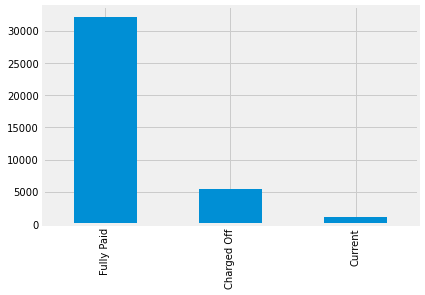

In [140]:
# Lets see the value distribution of loan_status

print(loan.loan_status.value_counts())
loan.loan_status.value_counts().plot.bar()


In [141]:
# Lets Drop the rows with current values as running loans doesn't indicate about defaulter or non-defaulter.
# ALso lets derive a new column [loan_status_qnt] out of loan_status as numerical column to perform a quantitative analysis.

loan.loan_status = loan.loan_status[~loan.loan_status.isin(['Current'])]
print(loan.loan_status.value_counts())

loan['loan_status_qnt'] = loan.loan_status.apply(lambda x:1 if x=='Charged Off' else 0)
loan.head()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_qnt
0,1077501,1296599,5000,5000,4975.0,36,10.7,162.9,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.6,0,Jan-85,1,3,0,13648,83.7,9,0.0,0.0,5863.2,5833.8,5000.0,863.2,0.0,0.0,0.0,Jan-15,171.6,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.3,59.8,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.0,0,Apr-99,5,3,0,1687,9.4,4,0.0,0.0,1008.7,1008.7,456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36,16.0,84.3,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.7,0,Nov-01,2,2,0,2956,98.5,10,0.0,0.0,3005.7,3005.7,2400.0,605.7,0.0,0.0,0.0,Jun-14,649.9,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.5,339.3,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.0,0,Feb-96,1,10,0,5598,21.0,37,0.0,0.0,12231.9,12231.9,10000.0,2214.9,17.0,0.0,0.0,Jan-15,357.5,Apr-16,0.0,0
4,1075358,1311748,3000,3000,3000.0,60,12.7,67.8,B,B5,1,RENT,80000.0,Source Verified,Dec-11,NaN,other,Personal,17.9,0,Jan-96,0,15,0,27783,53.9,38,524.1,524.1,3513.3,3513.3,2475.9,1037.4,0.0,0.0,0.0,May-16,67.8,May-16,0.0,0


### Define common function bivarite analysis

In [142]:
def percentage_estimator(x):
    return sum(x)*100.0/len(x)

def bivariate_analysis(df, x, label_rotation=0):
    bar = sns.barplot(x=x, y='loan_status_qnt', data=df, estimator=percentage_estimator)
    bar.set_xticklabels(bar.get_xticklabels(), rotation=label_rotation, horizontalalignment='center')
    plt.plot()
    
def bivariate_analysis_count(df, x, label_rotation=0):
    bar = sns.barplot(x=x, y='loan_status_qnt', data=df, estimator=sum)
    bar.set_xticklabels(bar.get_xticklabels(), rotation=label_rotation, horizontalalignment='center')
    plt.plot()

## Analying bivarite analysis between different variables in target column loan_status_qnt

### Term vs loan charged off rate

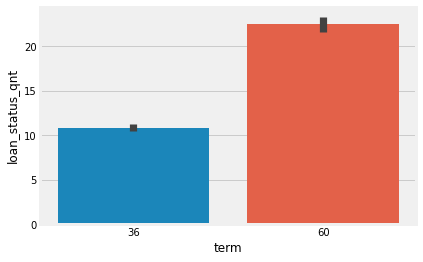

In [143]:
bivariate_analysis(loan, 'term')

### When compared with charged off rate higher term has major impact > 20% charged off rate 

### home ownership vs loan charged off rate

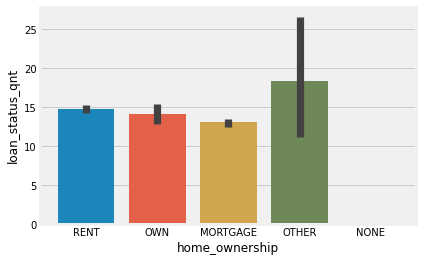

In [144]:
bivariate_analysis(loan, 'home_ownership')

### home ownership does not have any impact on charged off rate

### employment term vs loan charged off rate

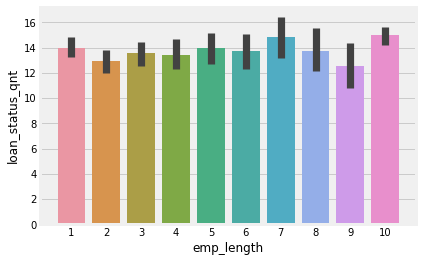

In [145]:
bivariate_analysis(loan, 'emp_length')

### employment term does not have any impact on charged off rate

### Purpose of loan vs loan charged off rate

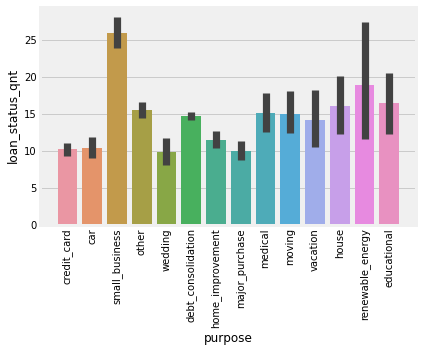

In [146]:
bivariate_analysis(loan, 'purpose', label_rotation=90)

### Charged off or loan default rate is higher when load is taken for small business 

### Check interest rate vs loan charged off rate

In [147]:
# Convert interest rate to bins

int_rate_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '>20%']
int_rate_bins = [0, 5, 10, 15, 20, 100]
loan['int_rate_bin'] = pd.cut(loan['int_rate'], bins=int_rate_bins, labels=int_rate_labels)

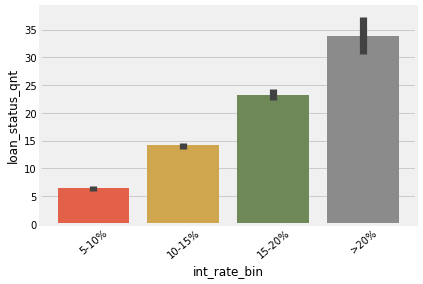

In [148]:
bivariate_analysis(loan, 'int_rate_bin', label_rotation=40)

### Charged off or loan default rate increases as rate of interest goes up

###  grade vs loan charged off rate

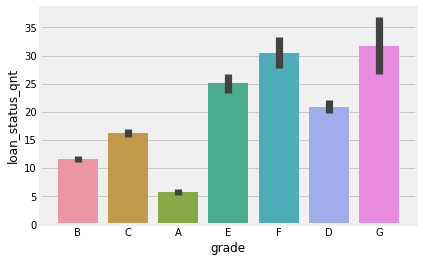

In [149]:
bivariate_analysis(loan, 'grade')

### As garde is lowered charged off or load default rate goes up significantly

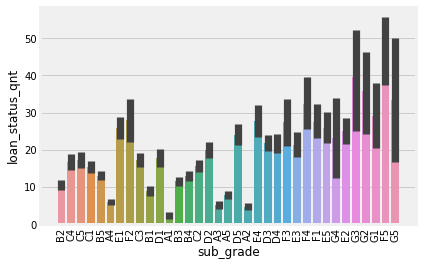

In [150]:
bivariate_analysis(loan, 'sub_grade', label_rotation=90)

### Loan amount vs loan default rate

In [151]:
# Put laan amount in bins
loan['loan_amnt_bins'] = pd.cut(loan['loan_amnt'], bins=np.linspace(0, 50000, 11))

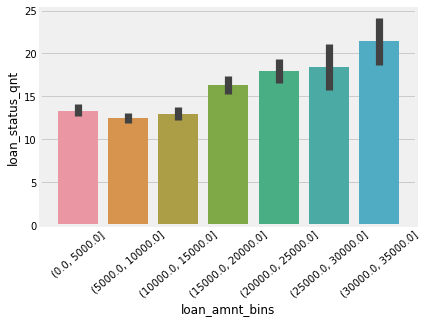

In [152]:
bivariate_analysis(loan, 'loan_amnt_bins', label_rotation=40)

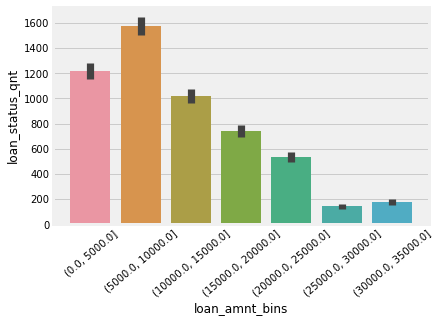

In [153]:
bivariate_analysis_count(loan, 'loan_amnt_bins', label_rotation=40)

### When loan amount is increases laon default rate also goes up somewhat, but number of loans with higher amount is also less to reach any conclusion 

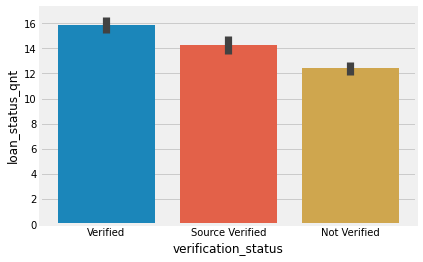

In [154]:
bivariate_analysis(loan, 'verification_status')

### Analyze DTI

In [155]:
# Put DTI In bins
loan.dti.describe()

count   38642.0
mean       13.3
std         6.7
min         0.0
25%         8.2
50%        13.4
75%        18.6
max        30.0
Name: dti, dtype: float64

In [156]:
loan['dti_bins'] = pd.cut(loan['dti'], bins=np.linspace(0, 30, 11))

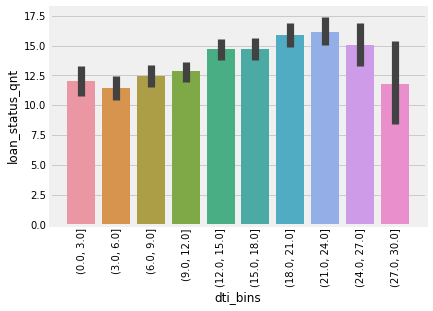

In [157]:
bivariate_analysis(loan, 'dti_bins', label_rotation=90)

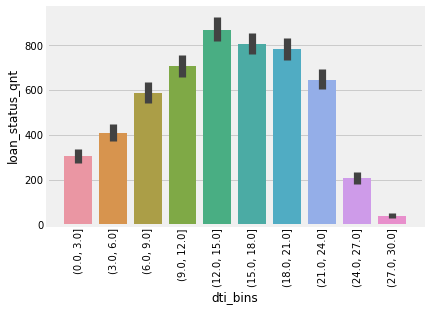

In [158]:
bivariate_analysis_count(loan, 'dti_bins', label_rotation=90)

### With increase in DTI loan default rate seems to go up till 24 and it decreses thereafter

### Analyse Income

In [159]:
loan.annual_inc.describe()

count     38642.0
mean      69608.3
std       64253.2
min        4000.0
25%       41400.0
50%       60000.0
75%       83200.0
max     6000000.0
Name: annual_inc, dtype: float64

In [160]:
loan.annual_inc.quantile(.9)

117000.0

In [161]:
steps = np.linspace(0, 120000.0, 13)
np.append(steps, 6000000.0)
loan['annual_inc_bins'] = pd.cut(loan['annual_inc'], bins=steps)

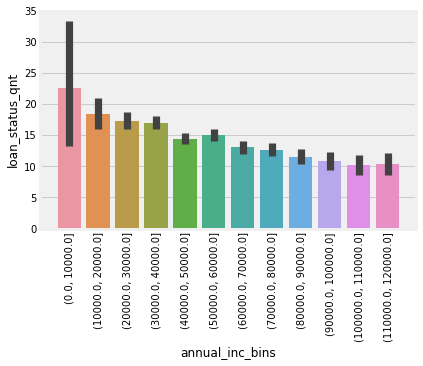

In [162]:
bivariate_analysis(loan, 'annual_inc_bins', label_rotation=90)

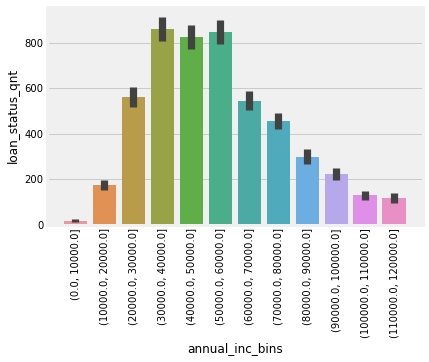

In [163]:
bivariate_analysis_count(loan, 'annual_inc_bins', label_rotation=90)

### When seen together with count and percenatge of loan default rate, annual income does not give any variations and it will be ignored for analysis.

## Multivariate Analysis

### Common function to generate heat map for two variables and loan charged off rate 

In [164]:
def draw_heatmap(df, x_axis, y_axis):
    df_groupby_pivot = df.pivot_table(index=x_axis, columns=y_axis, values='loan_status_qnt', aggfunc=percentage_estimator)
    df_groupby_pivot.fillna(0, inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(data=df_groupby_pivot, annot=True, ax=ax)
    
def draw_heatmap_count(df, x_axis, y_axis):
    df_groupby_pivot = df.pivot_table(index=x_axis, columns=y_axis, values='loan_status_qnt', aggfunc=sum)
    df_groupby_pivot.fillna(0, inplace=True)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(data=df_groupby_pivot, annot=True, ax=ax)

### Compare Grade and Purpose against loan default rate

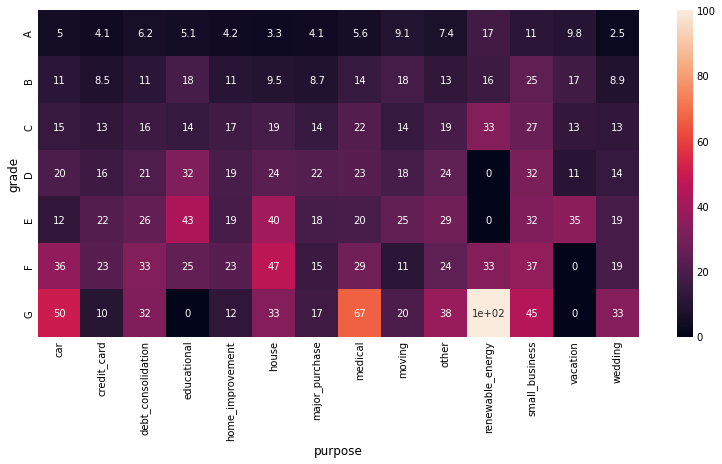

In [165]:
draw_heatmap(loan, 'grade', 'purpose')

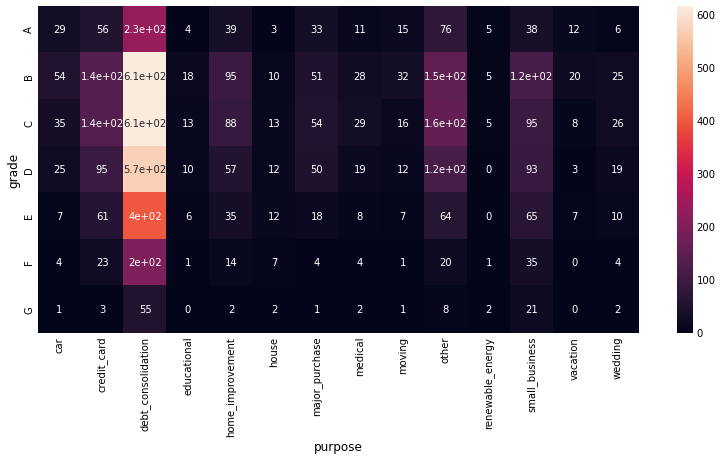

In [166]:
draw_heatmap_count(loan, 'grade', 'purpose')

### Default is high in case of Grade G and car medical, small business and renewable energy loans

### Compare with grade and term

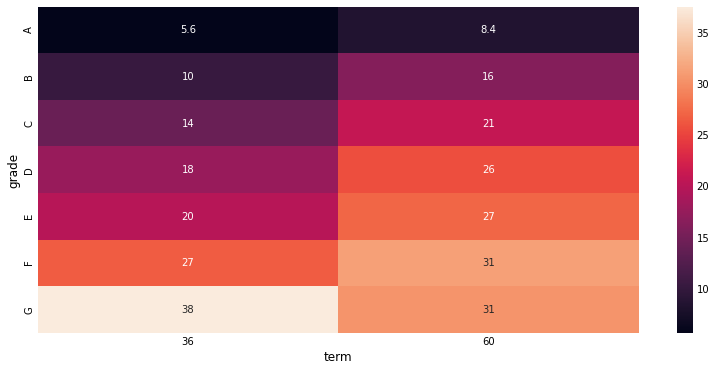

In [167]:
draw_heatmap(loan, 'grade', 'term')

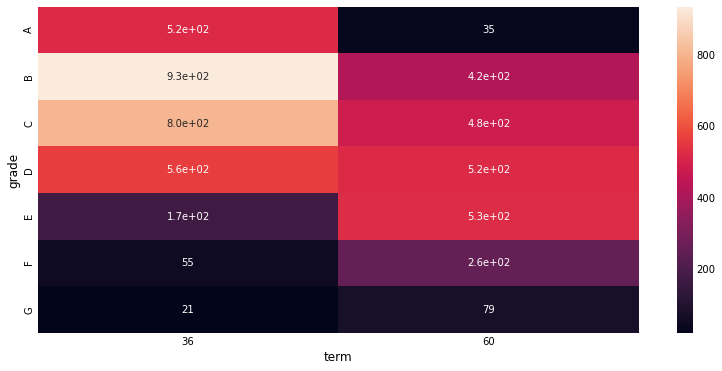

In [168]:
draw_heatmap_count(loan, 'grade', 'term')

### 60 month term seems to have more loan default rate for all grades with significant number of laons.

### Grade and Varification Status

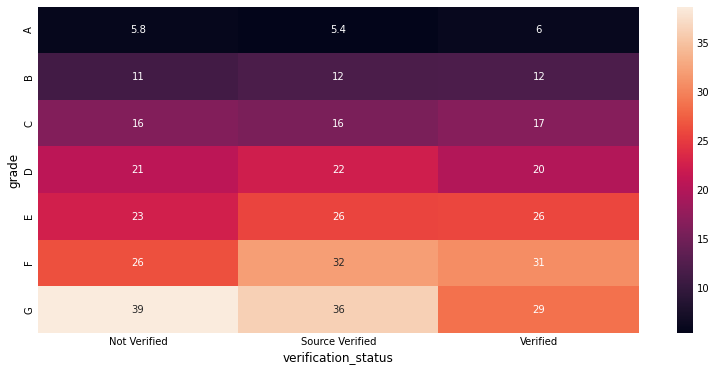

In [169]:
draw_heatmap(loan, 'grade', 'verification_status')

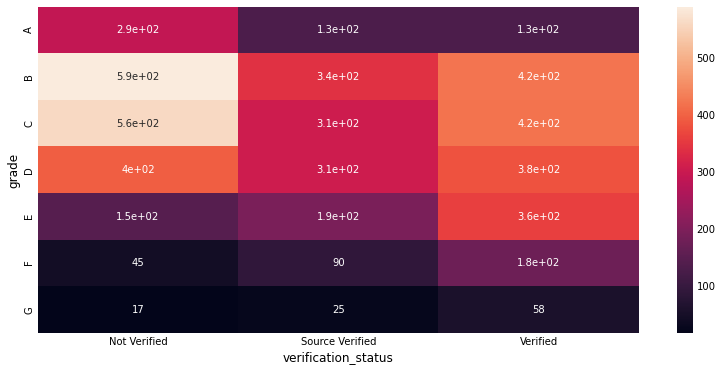

In [170]:
draw_heatmap_count(loan, 'grade', 'verification_status')

### It seems when Grade is G and income is not verified deafult rate is very high. But very few loans were offered with in that category.

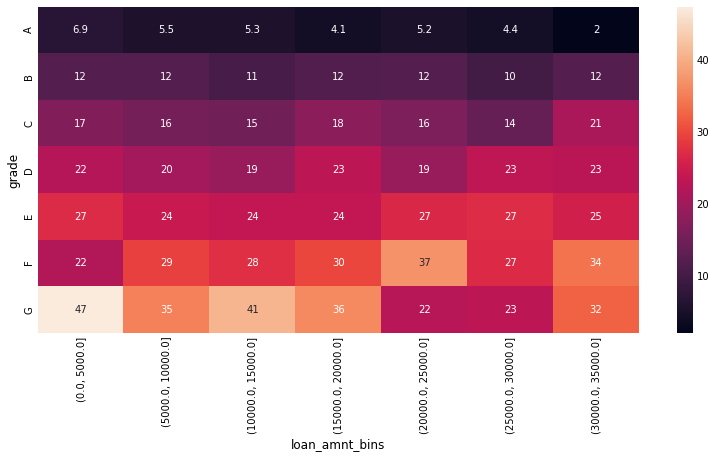

In [171]:
draw_heatmap(loan, 'grade', 'loan_amnt_bins')

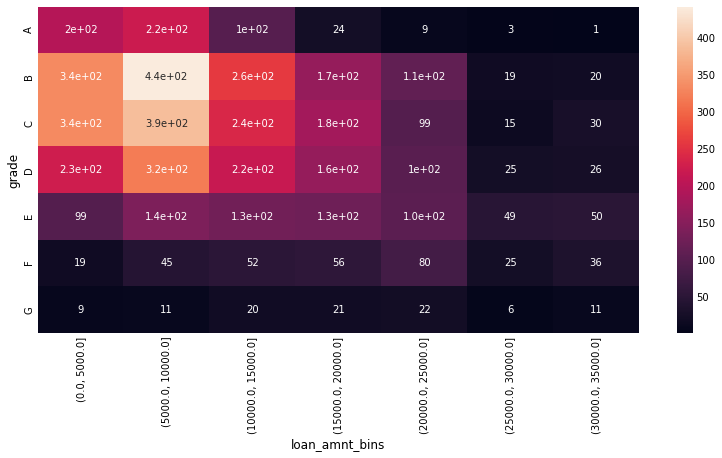

In [172]:
draw_heatmap_count(loan, 'grade', 'loan_amnt_bins')

### Term and DTI

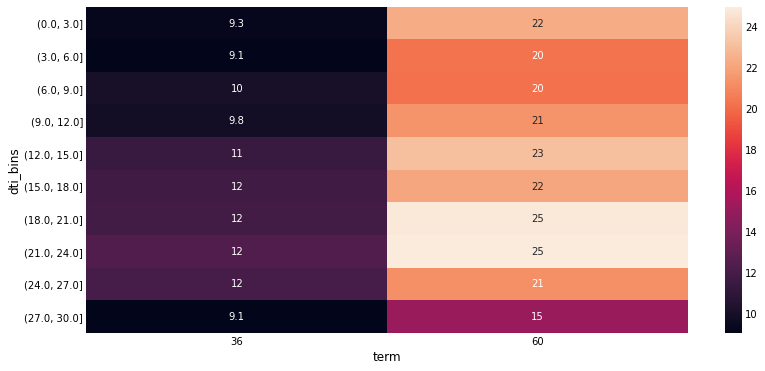

In [173]:
draw_heatmap(loan, 'dti_bins','term')

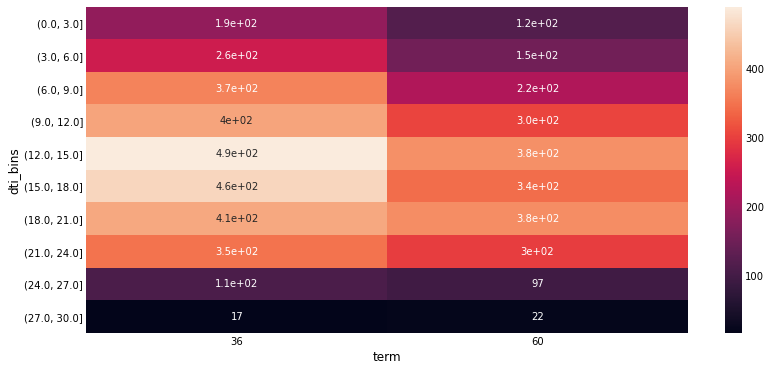

In [174]:
draw_heatmap_count(loan, 'dti_bins','term')

### Laon default rate is consistently high in 60 months term. It increases further slightly with increase in DTI

### Term and loan amount

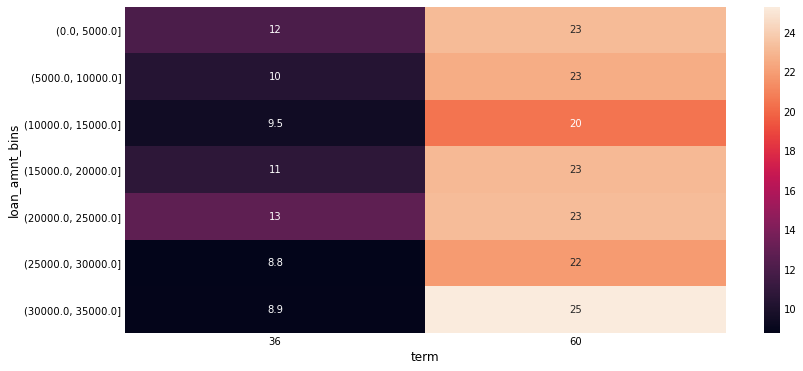

In [175]:
draw_heatmap(loan, 'loan_amnt_bins', 'term')

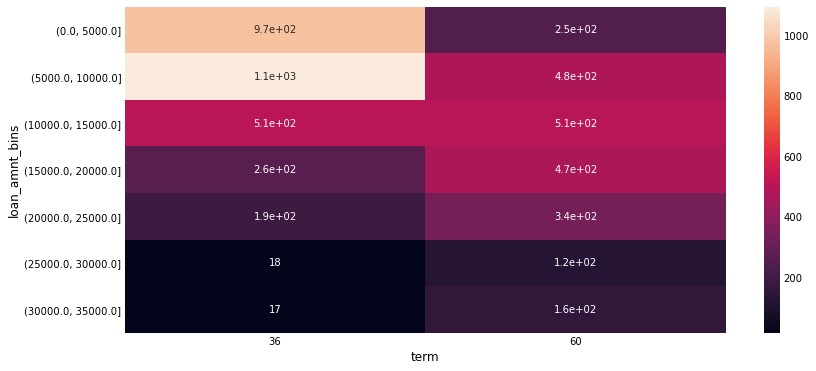

In [176]:
draw_heatmap_count(loan, 'loan_amnt_bins', 'term')

### Laon default rate is consistently high in 60 months term.

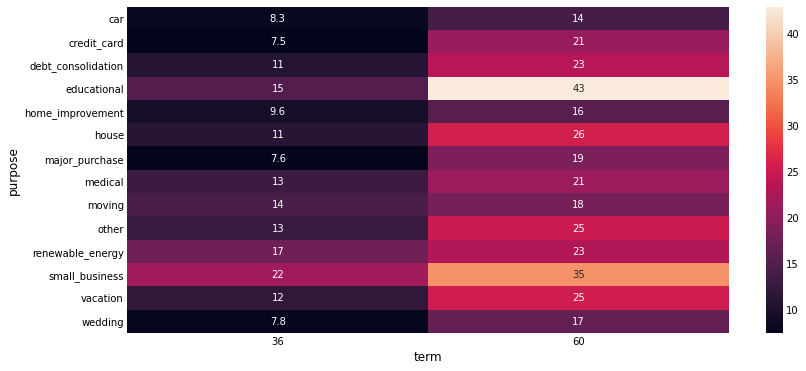

In [177]:
draw_heatmap(loan, 'purpose', 'term')

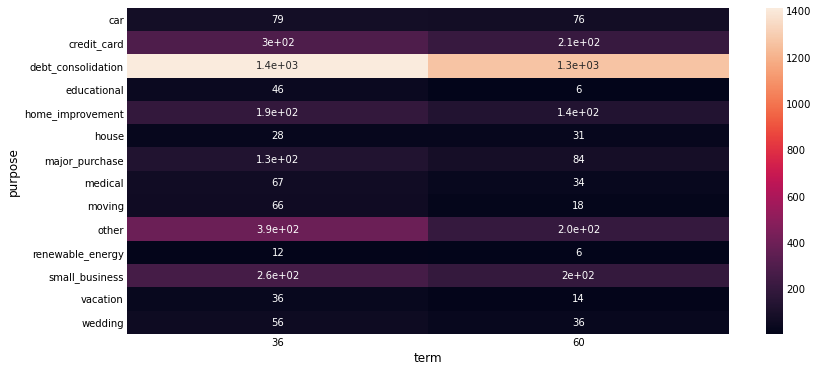

In [178]:
draw_heatmap_count(loan, 'purpose', 'term')

### Educational loan with 60 month is really bad performer 43% default rate and small business with 60 month is also very hgh 35%

### Term and interest rate

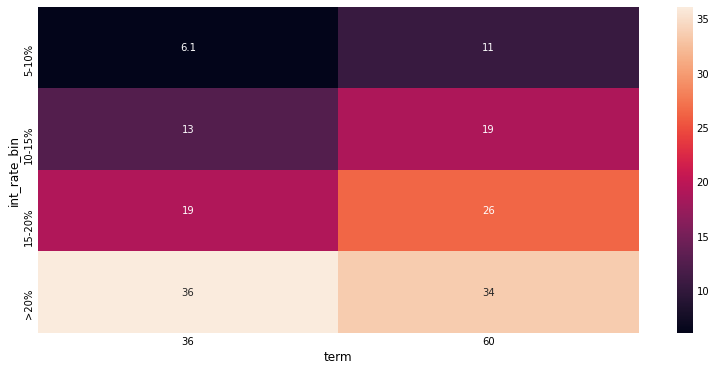

In [179]:
draw_heatmap(loan, 'int_rate_bin', 'term')

### Purpose and interest rate

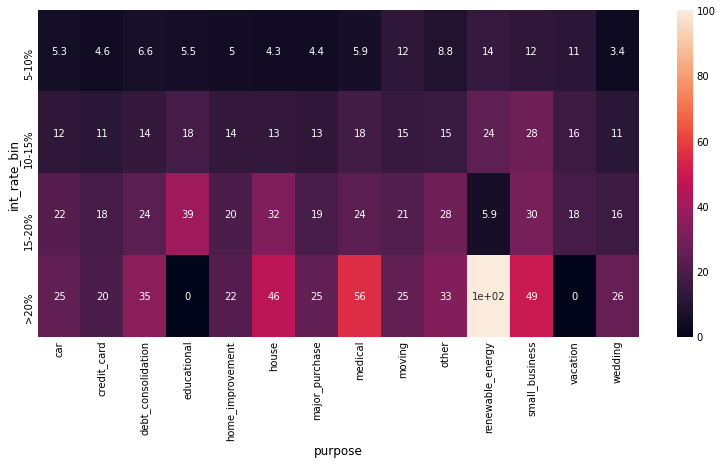

In [180]:
draw_heatmap(loan, 'int_rate_bin', 'purpose')

### Rate of default is very high when interest rate is high > 15 and loan type is educational and small business, renewable energy, medical or house